Здесь предобработка ЭЭГ

S101 - ЭКоГ

S104 - ЭКоГ

S105 - ?

In [1]:
!pip install mne 
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [214]:
def to_secs(hours, minutes, secs):
    secs=hours*60*60+minutes*60+secs
    return secs

## Загружаем ЭЭГ запись

In [2]:
code='1'

In [3]:
subject='S101'

In [4]:
os.getcwdb()

b'C:\\Users\\khani\\skolteh\\WEEK1\\WEEK1'

In [5]:
raw_data=mne.io.read_raw_edf(subject+'\S101.edf', preload=True)

Extracting EDF parameters from C:\Users\khani\skolteh\WEEK1\WEEK1\S101\S101.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5545983  =      0.000 ...  2708.000 secs...


In [20]:
raw_data

<RawEDF | S101.edf, 27 x 5545984 (2708.0 s), ~1.12 GB, data loaded>

In [11]:
raw_data.ch_names

['EEG L.vis__1',
 'EEG L.vis__2',
 'EEG L.vis__3',
 'EEG L.vis__4',
 'EEG L.vis__5',
 'EEG L.vis__6',
 'EEG L.vis__7',
 'EEG L.vis__8',
 'EEG L.lob__1',
 'EEG L.lob__2',
 'EEG L.lob__3',
 'EEG L.lob__4',
 'EEG L.lob__5',
 'EEG L.lob__6',
 'EEG L.lob__7',
 'EEG L.lob__8',
 'EEG R.vis__1',
 'EEG R.vis__2',
 'EEG R.vis__3',
 'EEG R.vis__4',
 'EEG R.vis__5',
 'EEG R.vis__6',
 'EEG R.vis__7',
 'EEG R.vis__8',
 'EEG R.lob__1',
 'EEG R.lob__2',
 'EEG R.lob__3',
 'EEG R.lob__4',
 'EEG R.lob__5',
 'EEG R.lob__6',
 'EEG R.lob__7',
 'EEG R.lob__8',
 'B',
 'C',
 'MK']

In [243]:
raw_data.drop_channels(raw_data.ch_names[-1])

<RawEDF | S105.edf, 26 x 5664768 (2766.0 s), ~1.10 GB, data loaded>

В S101 подозрительные каналы: L.vis_1, R.vis_7, R.vis_8

S104: L.vis_1, L.lob_7, L.lob_8, R.lob_1, R.vis_1, R.vis_2, L.lob_6

In [159]:
fs=raw_data.info['sfreq'] #частота дискретизации 

In [161]:
fs

2048.0

### S105

In [245]:
for i in range(len(raw_data.ch_names)-2):
    electrode_number = (i // 8) + 1  # номер электрода
    branch_number = (i % 8) + 1  # номер ответвления 

    new_channel_name = f'EEG {electrode_number}_{branch_number}'

    raw_data.rename_channels({raw_data.ch_names[i]: new_channel_name})

In [247]:
raw_data.ch_names

['EEG 1_1',
 'EEG 1_2',
 'EEG 1_3',
 'EEG 1_4',
 'EEG 1_5',
 'EEG 1_6',
 'EEG 1_7',
 'EEG 1_8',
 'EEG 2_1',
 'EEG 2_2',
 'EEG 2_3',
 'EEG 2_4',
 'EEG 2_5',
 'EEG 2_6',
 'EEG 2_7',
 'EEG 2_8',
 'EEG 3_1',
 'EEG 3_2',
 'EEG 3_3',
 'EEG 3_4',
 'EEG 3_5',
 'EEG 3_6',
 'EEG 3_7',
 'EEG 3_8',
 'B',
 'C']

In [11]:
%matplotlib qt5

Using matplotlib as 2D backend.


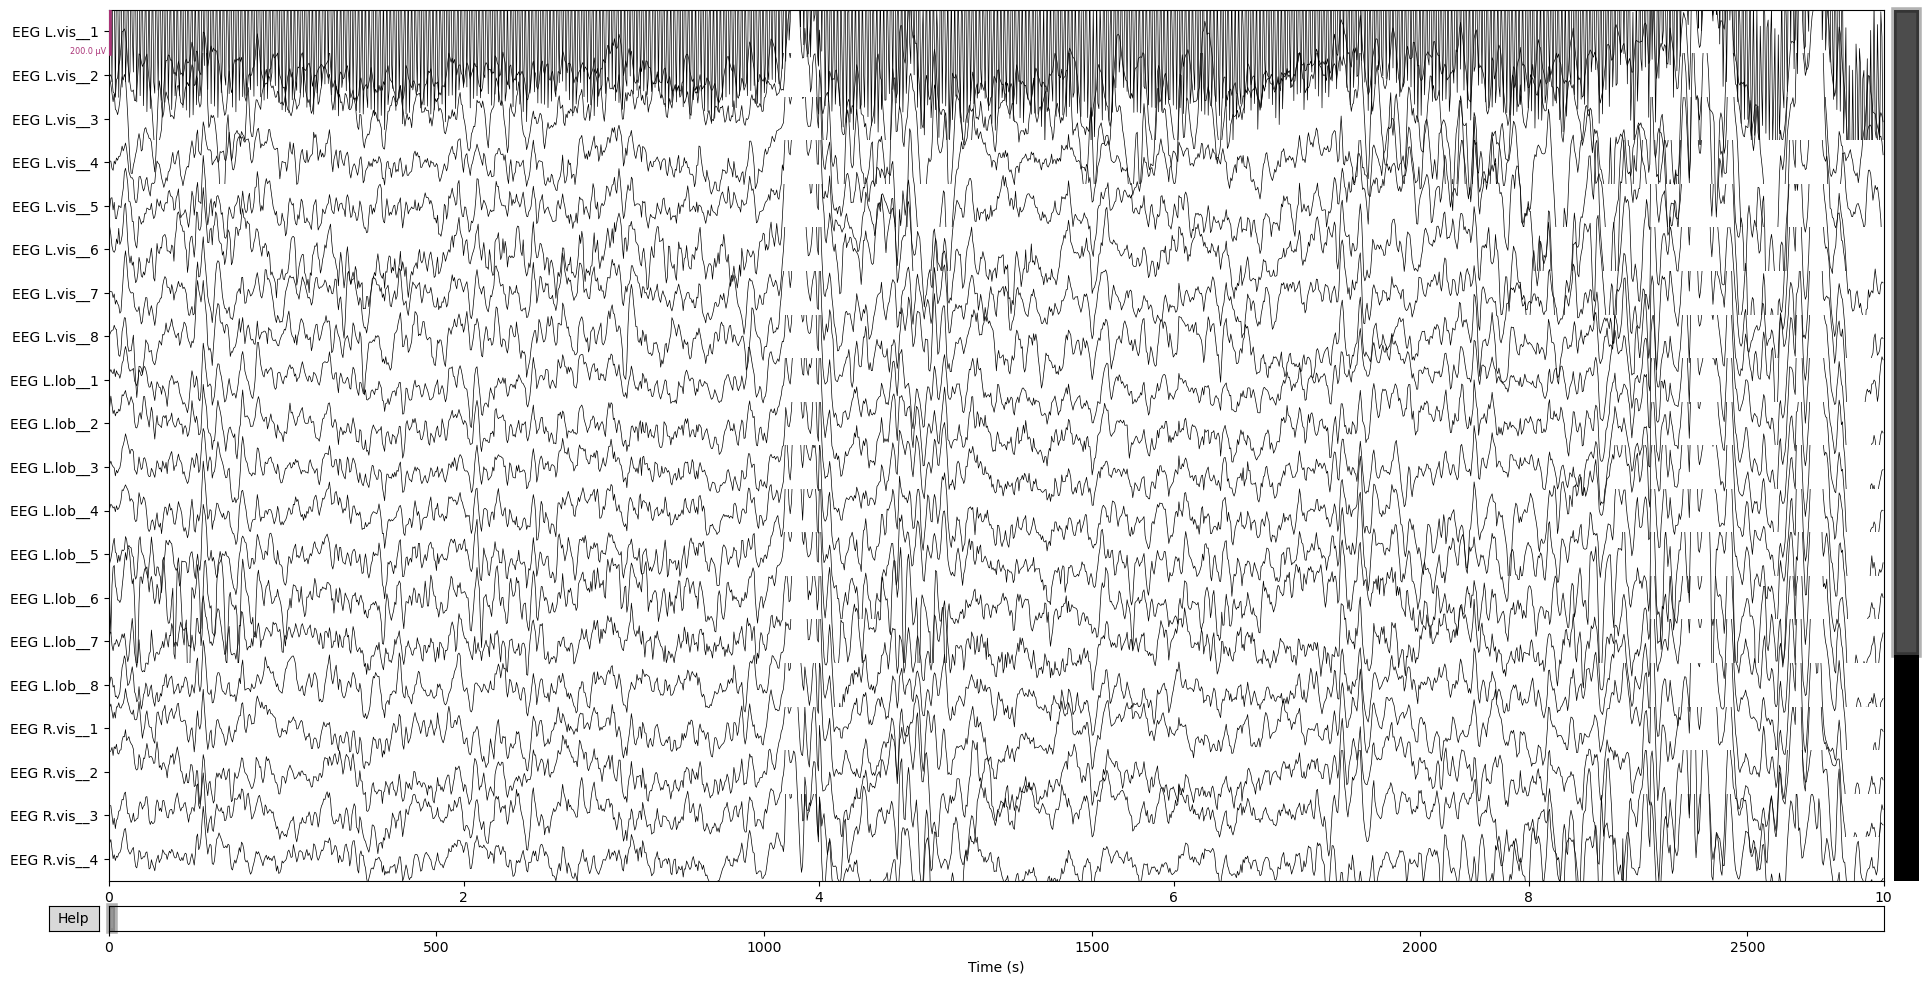

In [12]:
raw_data.plot(scalings={'eeg':1e-4})

S105: удаляем 1_6, 2_8, 3_5, 3_6, 3_7, 3_8

In [255]:
drop_list = ['EEG 1_6', 'EEG 2_8', 'EEG 3_5', 'EEG 3_6', 'EEG 3_7', 'EEG 3_8'] 
raw_data.drop_channels(drop_list)

<RawEDF | S105.edf, 20 x 5664768 (2766.0 s), ~864.4 MB, data loaded>

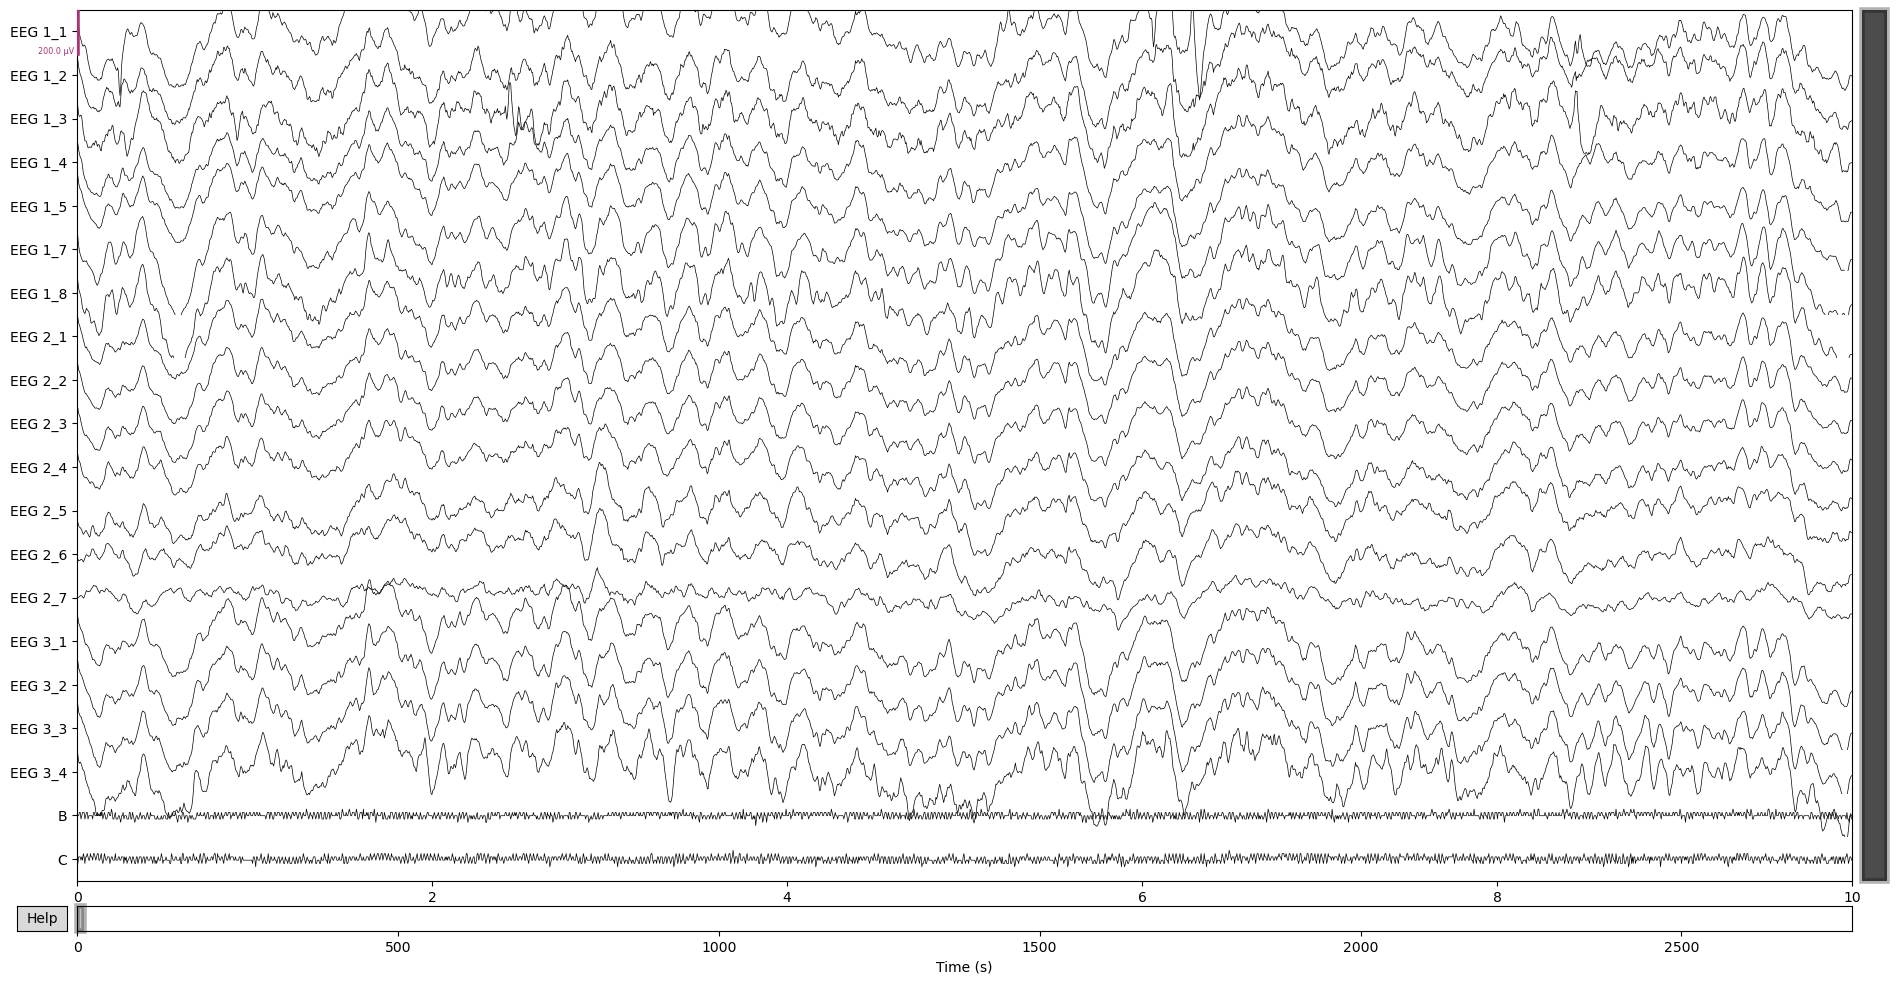

In [257]:
raw_data.plot(scalings={'eeg':1e-4})

Вычитаем среднее из каналов (Средняя референтная реконфигурация)

In [267]:
def sub_mean(raw_data, group):
    group_indices = [raw_data.ch_names.index(ch) for ch in group]
    
    group_data = raw_data.get_data(picks=group_indices)
    mean_data = np.mean(group_data, axis=0)
    
    raw_data._data[group_indices, :] -= mean_data

In [269]:
raw_data.ch_names

['EEG 1_1',
 'EEG 1_2',
 'EEG 1_3',
 'EEG 1_4',
 'EEG 1_5',
 'EEG 1_7',
 'EEG 1_8',
 'EEG 2_1',
 'EEG 2_2',
 'EEG 2_3',
 'EEG 2_4',
 'EEG 2_5',
 'EEG 2_6',
 'EEG 2_7',
 'EEG 3_1',
 'EEG 3_2',
 'EEG 3_3',
 'EEG 3_4',
 'B',
 'C']

In [271]:
g1 = ['EEG 1_1', 'EEG 1_2', 'EEG 1_3', 'EEG 1_4', 'EEG 1_5', 'EEG 1_7', 'EEG 1_8']
g2 = ['EEG 2_1', 'EEG 2_2', 'EEG 2_3', 'EEG 2_4', 'EEG 2_5', 'EEG 2_6', 'EEG 2_7']
g3 = ['EEG 3_1', 'EEG 3_2', 'EEG 3_3', 'EEG 3_4']

sub_mean(raw_data, g1)
sub_mean(raw_data, g2)
sub_mean(raw_data, g3)

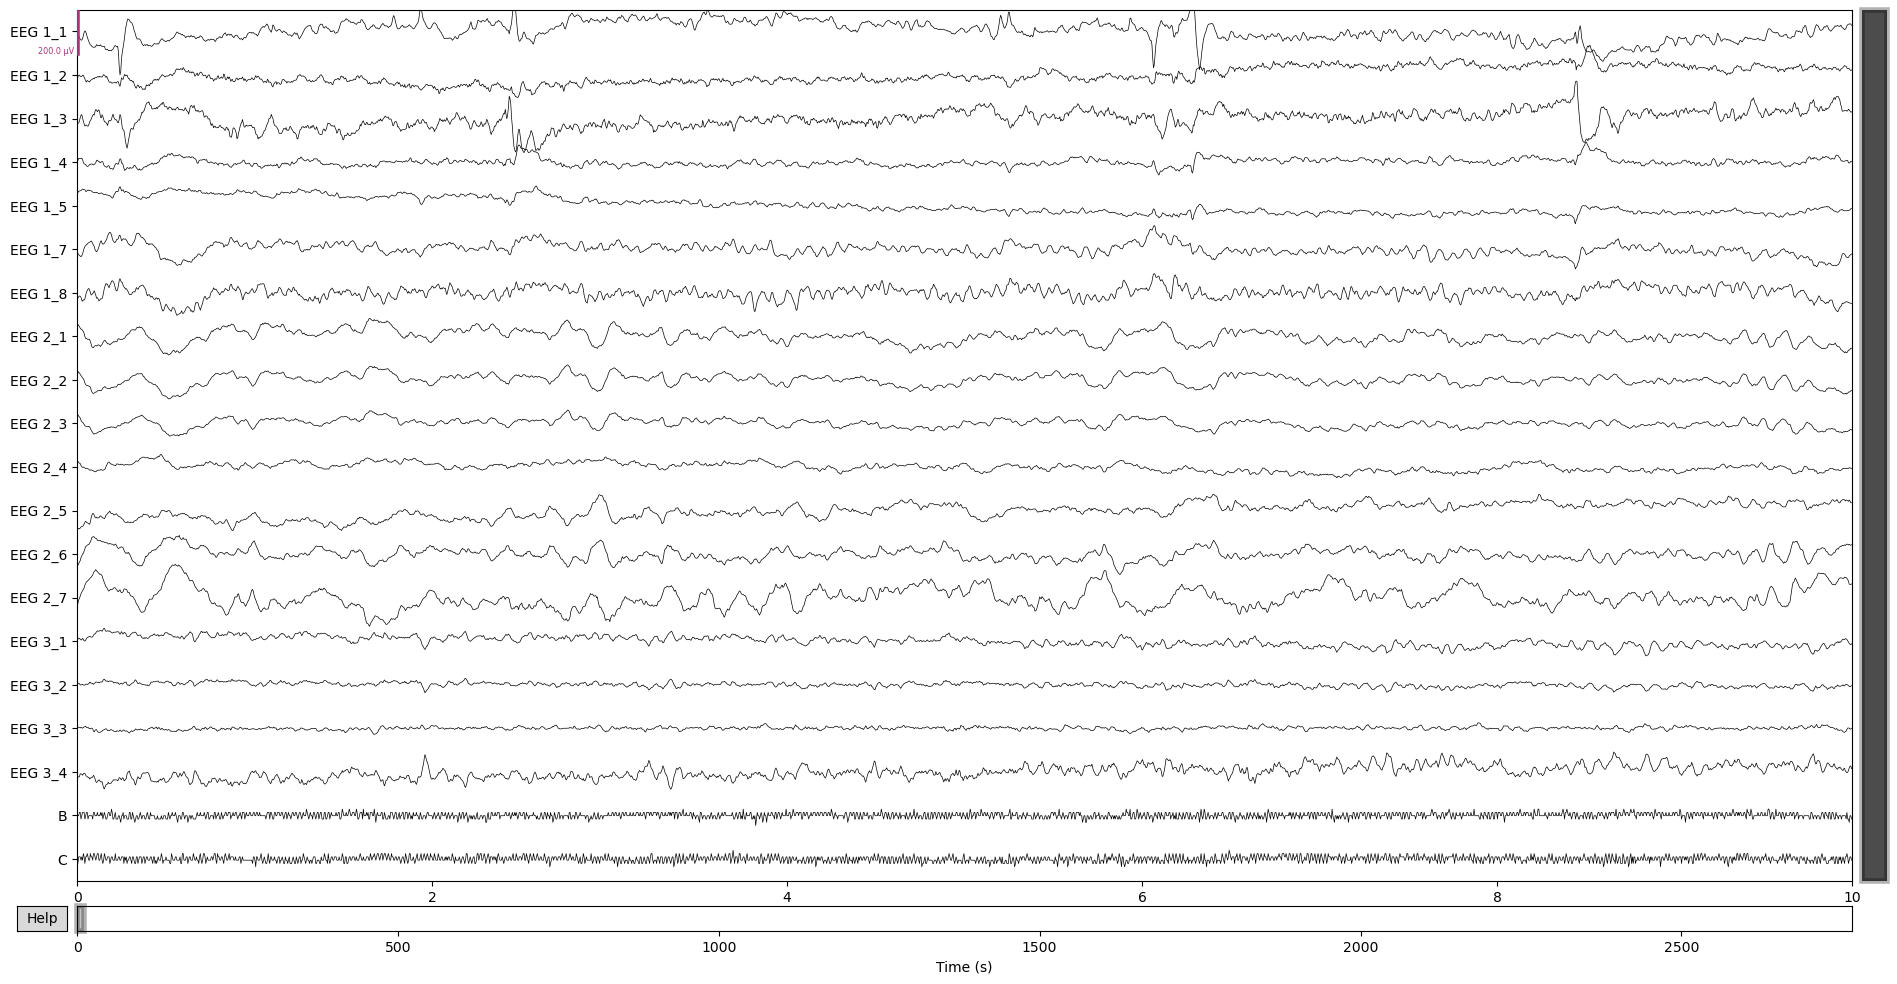

In [273]:
raw_data.plot(scalings={'eeg':1e-4})

### Фильтрация

Максимальная частота сигнала, которую можно корректно дискретизировать, равна половине частоты дискретизации, поэтому послед-ть от 0 до fs/2:

In [277]:
raw_data.notch_filter(np.arange(0, fs/2,50)[1:])

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13517 samples (6.600 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.5s


<RawEDF | S105.edf, 20 x 5664768 (2766.0 s), ~864.4 MB, data loaded>

Строим спектры мощности для каналов. 

In [280]:
raw_data.notch_filter(np.arange(0, 400/2,50)[1:], notch_widths=2)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13517 samples (6.600 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.8s


<RawEDF | S105.edf, 20 x 5664768 (2766.0 s), ~864.4 MB, data loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.
NOTE: plot_psd() is a legacy function. New c

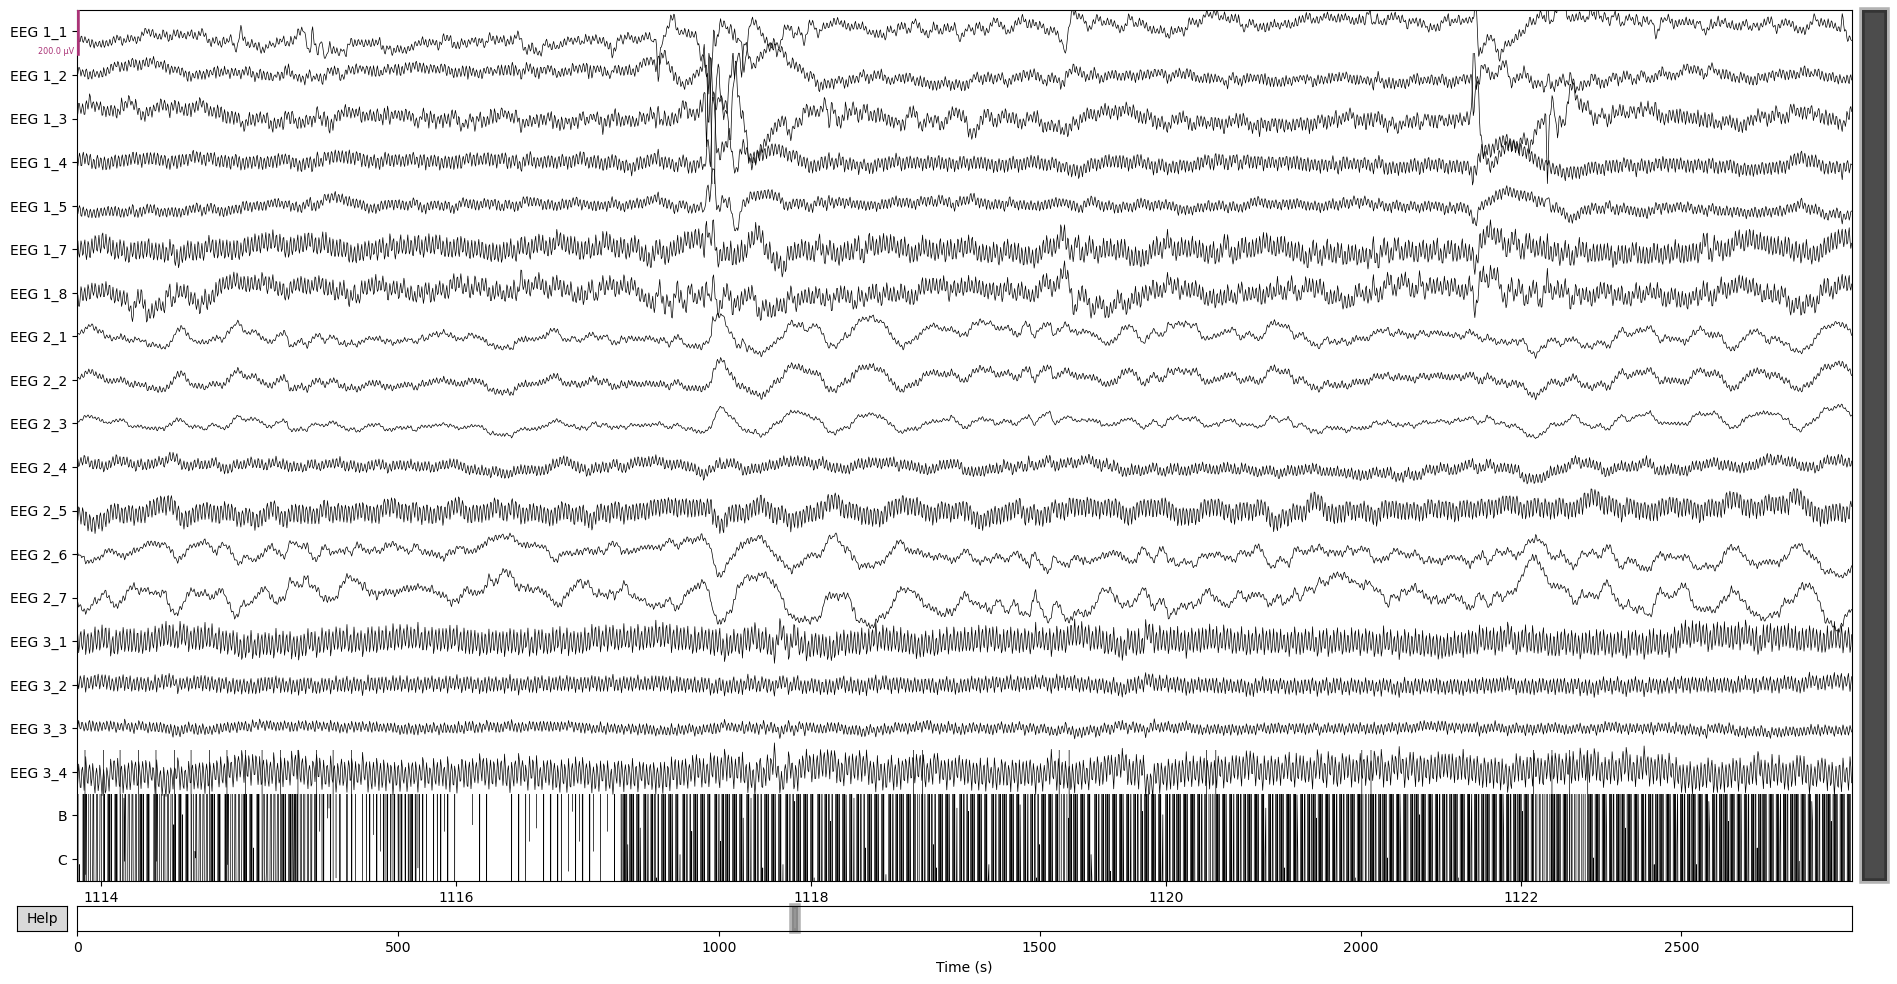

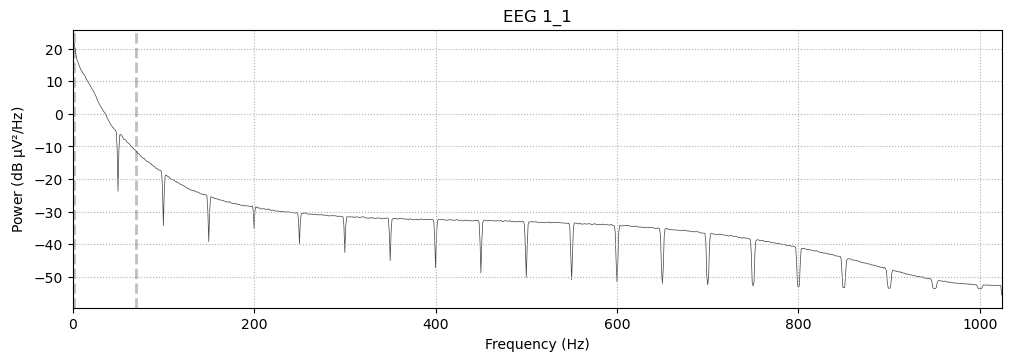

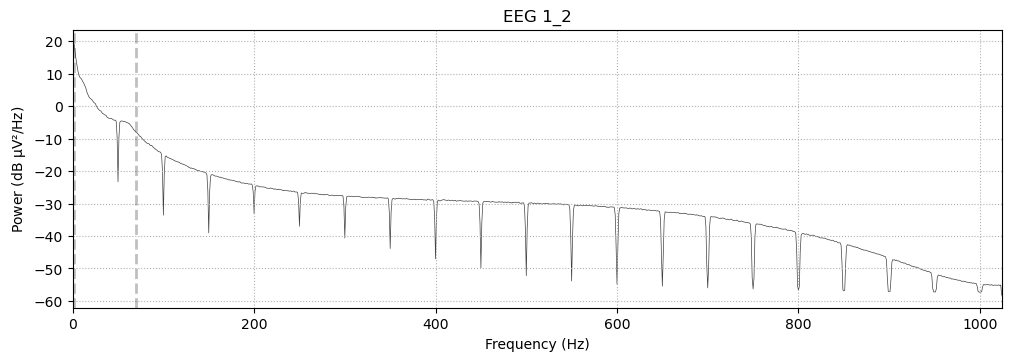

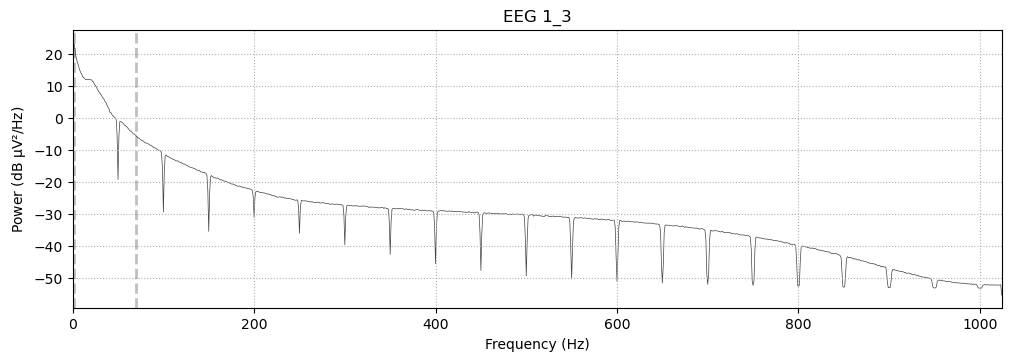

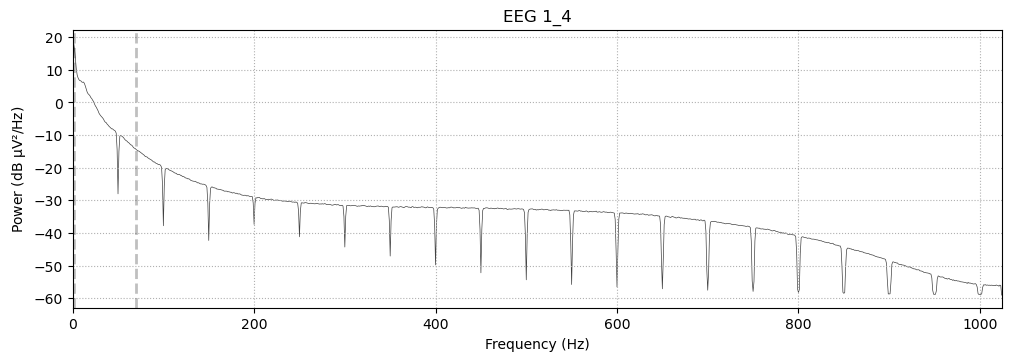

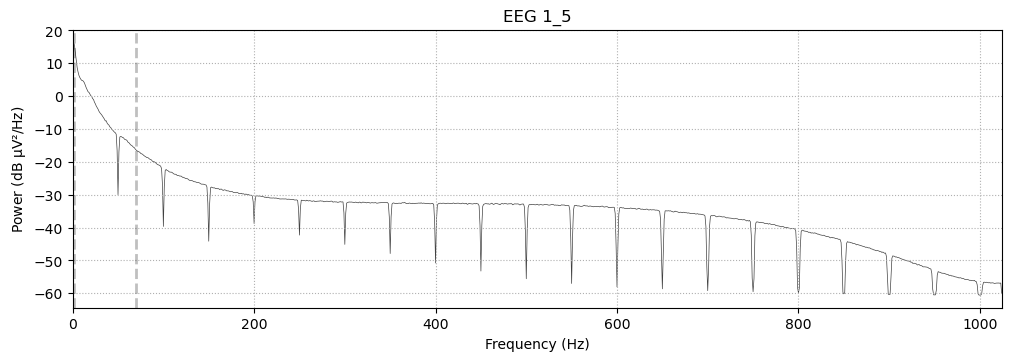

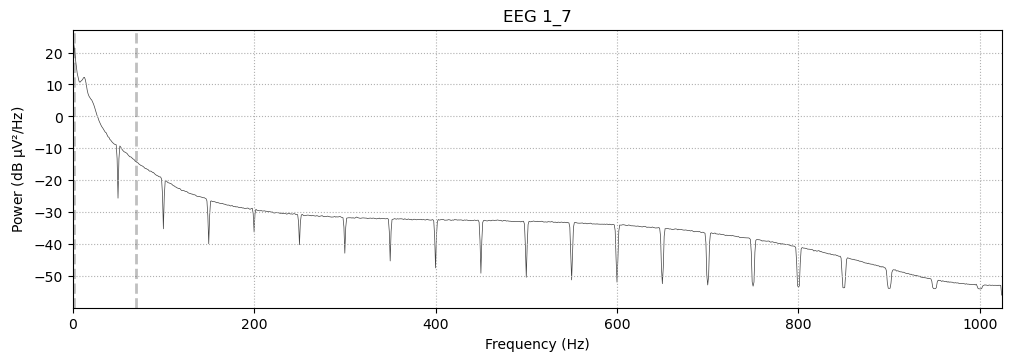

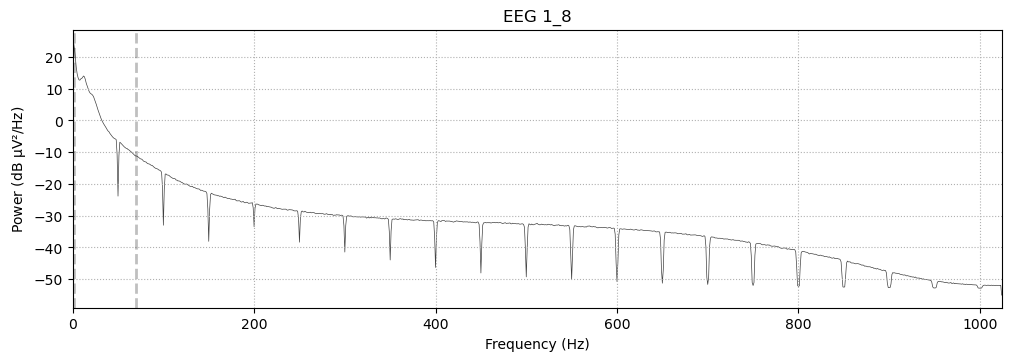

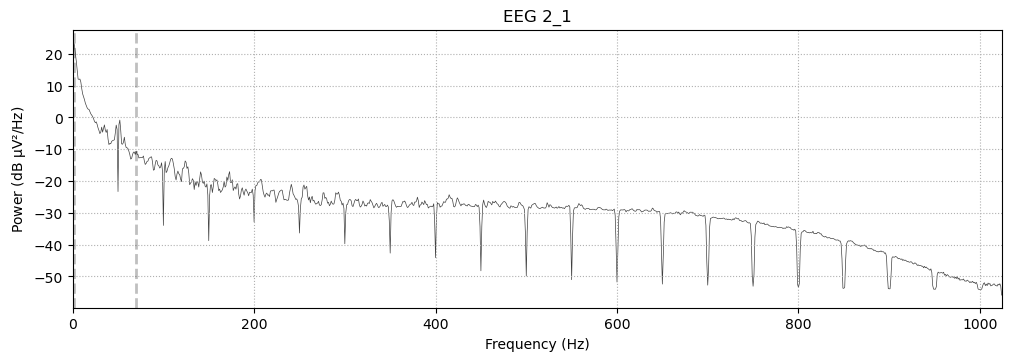

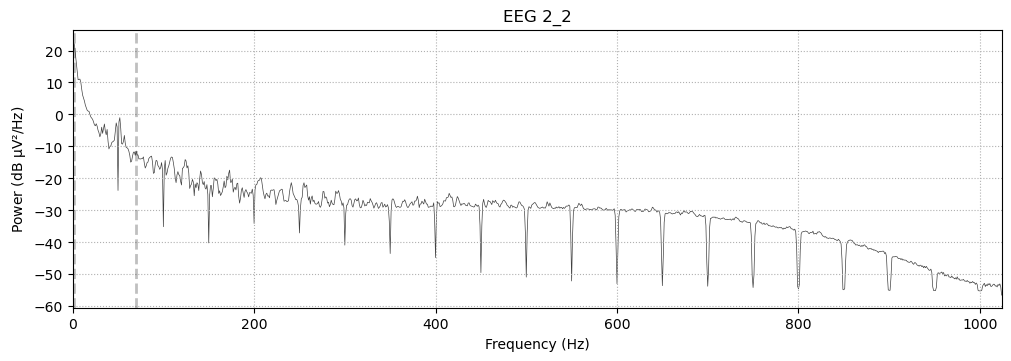

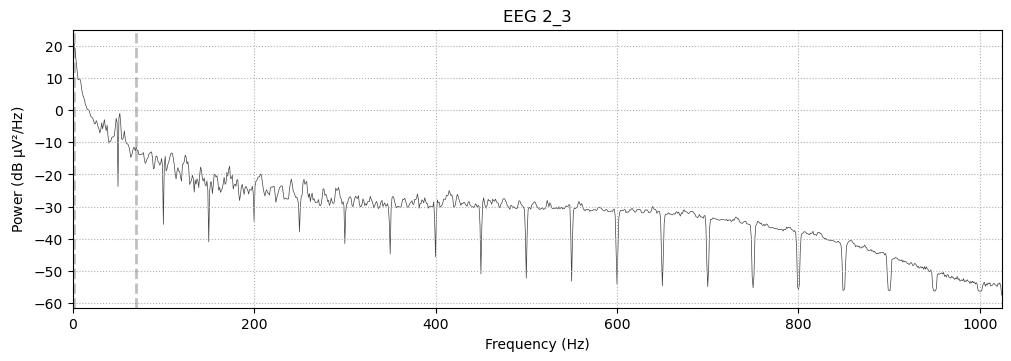

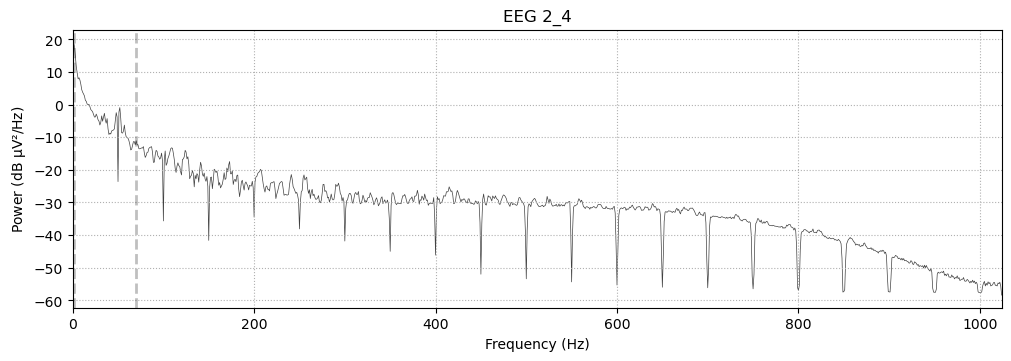

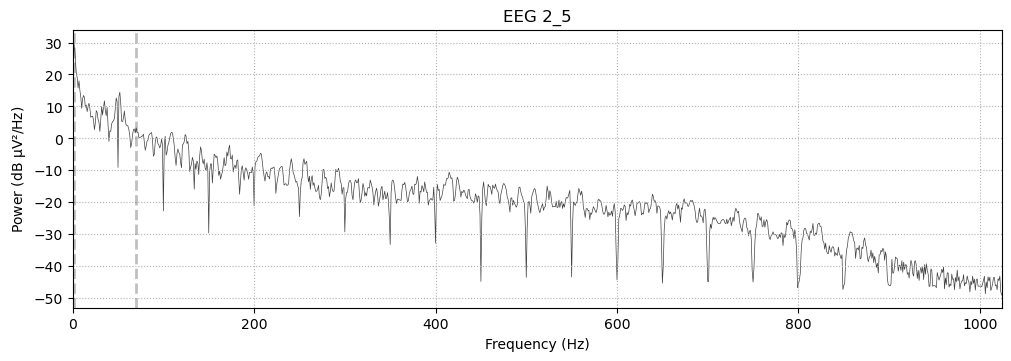

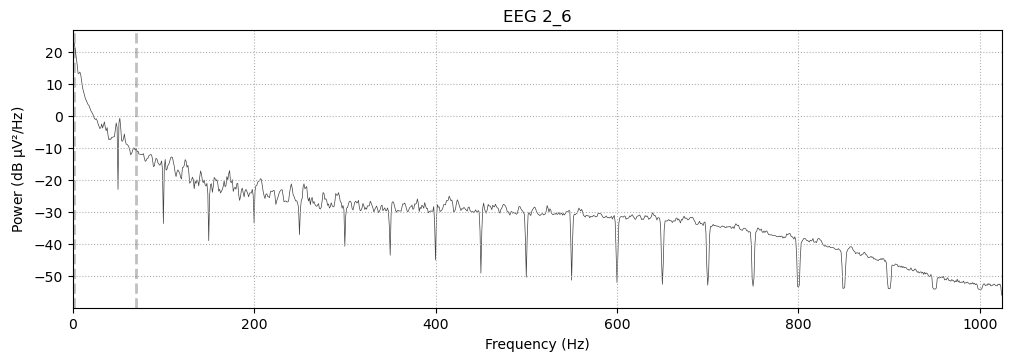

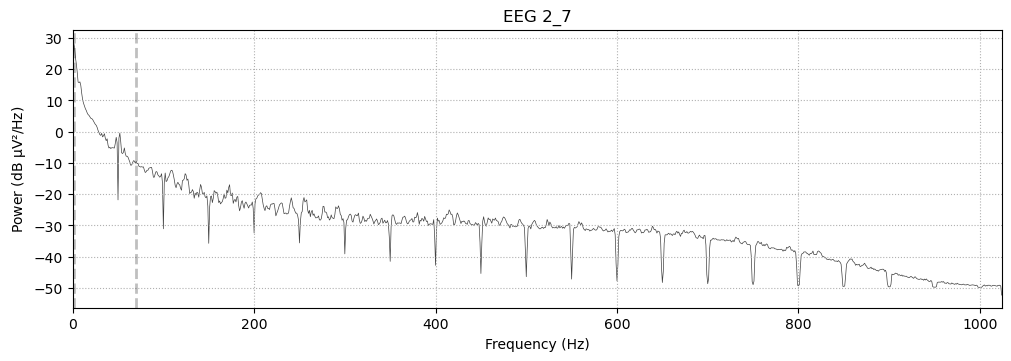

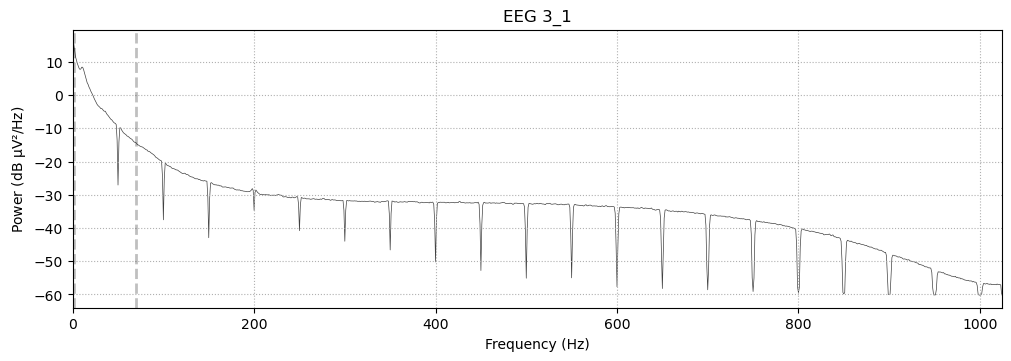

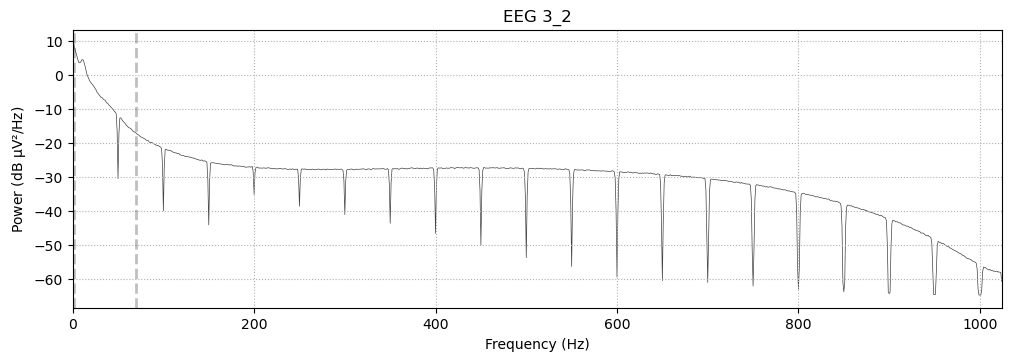

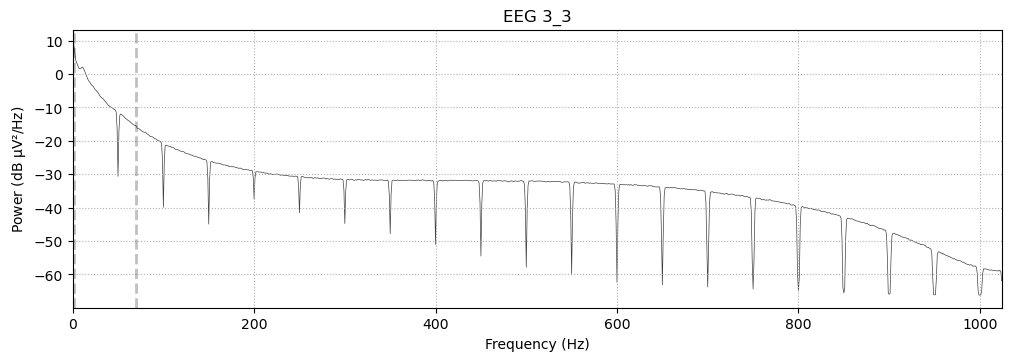

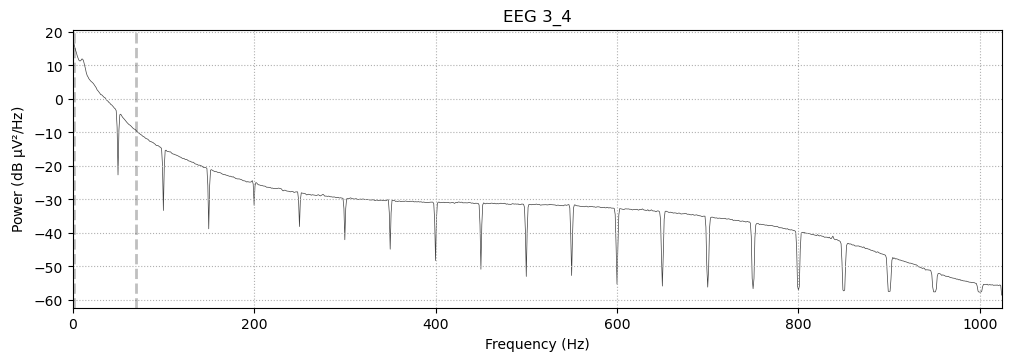

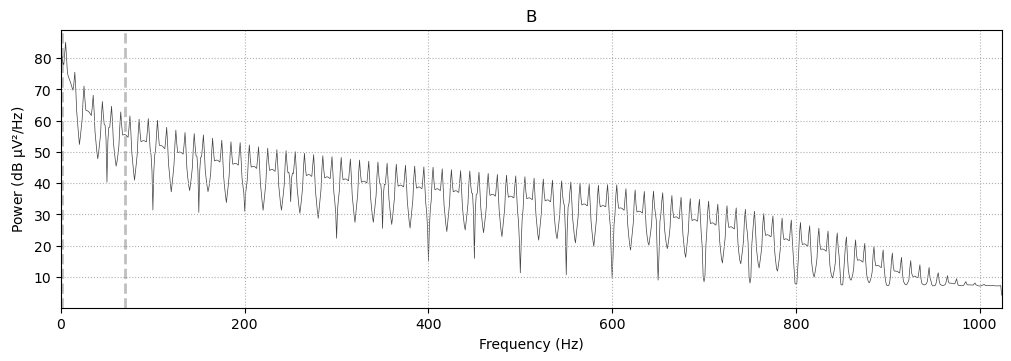

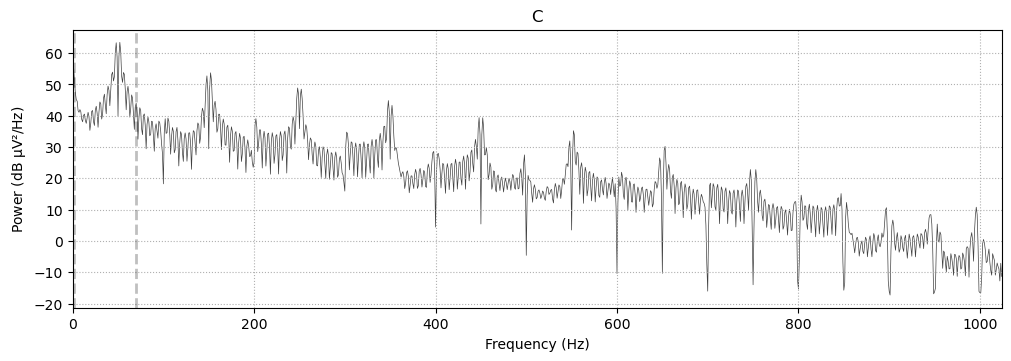

Channels marked as bad:
none


In [282]:
%matplotlib inline
for i in range(len(raw_data.ch_names)): 
    raw_data.plot_psd(picks=[i])
    plt.title(raw_data.ch_names[i])

In [284]:
### Удаление каналов для S105
drop_list_psd = ['EEG 2_1', 'EEG 2_2', 'EEG 2_3', 'EEG 2_4', 'EEG 2_5', 'EEG 2_6', 'EEG 2_7'] 
raw_data.drop_channels(drop_list_psd)

<RawEDF | S105.edf, 13 x 5664768 (2766.0 s), ~561.9 MB, data loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


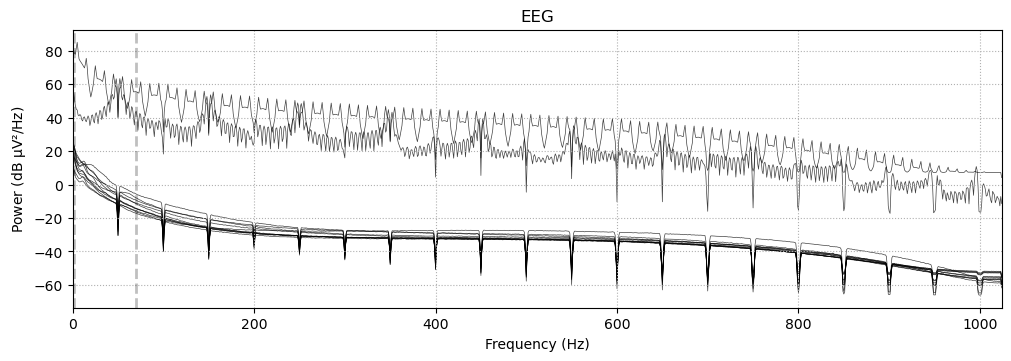

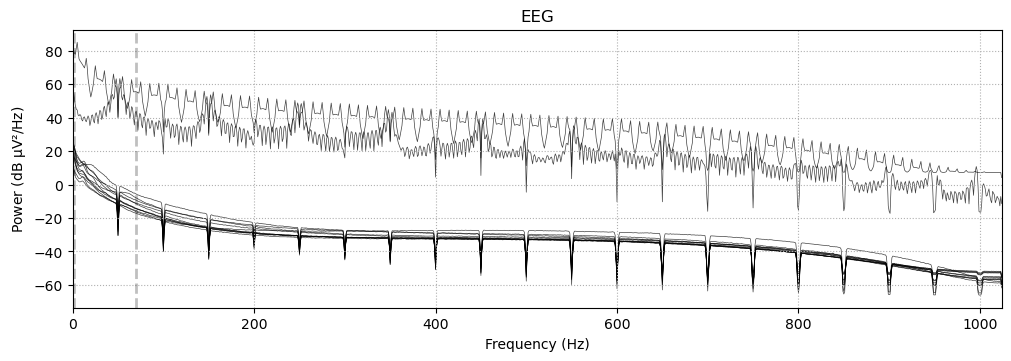

In [286]:
raw_data.plot_psd()

## Извлекаем канал с меткой

In [289]:
#marks_ch='C' #S101 S104
marks_ch='B' #S105
marks_array=raw_data[marks_ch][0][0]
mean_=np.mean(raw_data[marks_ch][0][0])
std_=np.std(raw_data[marks_ch][0][0])

In [291]:
marks_ch

'B'

Будем брать метки выше порога.

In [294]:
max_=mean_+0.3*std_
min_=mean_-0.3*std_ 

max_array_=[max_]*len(raw_data[marks_ch][0][0])
min_array_=[min_]*len(raw_data[marks_ch][0][0])

In [295]:
%matplotlib qt5
plt.plot(marks_array)
plt.plot(max_array_)
plt.plot(min_array_)
plt.plot(np.where(marks_array>max_)[0],[max_]*len(np.where(marks_array>max_)[0]),'o') #значение макс в точках, где метки > максимума

In [298]:
#Здесь хранятся все метки, которые выше порога, но есть и лишние
marks_array_inds=np.where(marks_array>max_)[0]

In [300]:
len(marks_array_inds)

398242

## Отбираем каждую 5-ю метку

для этого берем метки на расстоянии 5000 временных отсчетов.

In [303]:
new_marks_array_inds=[marks_array_inds[0]]
for i in range(1,len(marks_array_inds)):
    if marks_array_inds[i]-marks_array_inds[i-1]>=5000:
        new_marks_array_inds.append(marks_array_inds[i])

In [305]:
len(new_marks_array_inds) #256, а не 255, потому что посчитали самую первую метку до начала сессий

256

У S104 не 256, а 253 метки

Убираем лишнюю метку

In [309]:
new_marks_array_inds=new_marks_array_inds[1:]

In [311]:
plt.plot(marks_array, color='g', label='All marks from a tablet')
plt.plot(max_array_,color='b', label='Max threshold')
plt.plot(min_array_,color='y', label='Min threshold')
plt.plot(new_marks_array_inds,[max_]*len(new_marks_array_inds),'o',color='r', label='Marks')
plt.xlabel('Time') 
plt.ylabel('Amplitude')  
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06), ncol=4)
plt.show()

In [313]:
len(new_marks_array_inds)

255

У S104 не хватает 3х меток. 

Во 2-й сессии нет первого числа (8), начинается с 7,3,5,9... В 4-й тоже пропуск первого (0) 2,1,1,5...

В 5-1 пропуск первого (3) 3,5,4,6...

In [316]:
first_samp=raw_data.first_samp #индекс первого отсчета, это смещение относительно начала записи данных

In [318]:
first_samp #если != 0, то запись обрезана

0

## Создаем массивы для хранения событий. В первом столбце - индексы меток

In [321]:
events_times=np.array(new_marks_array_inds)+first_samp 
events_zeros=np.zeros(len(new_marks_array_inds))
events_codes=np.zeros(len(new_marks_array_inds)) 

In [323]:
events=np.vstack([events_times,events_zeros,events_codes]).T.astype(int) #объединяем массивы, транспонируем и приводим к инту

In [325]:
events

array([[ 897393,       0,       0],
       [ 909140,       0,       0],
       [ 927701,       0,       0],
       [ 945621,       0,       0],
       [ 963698,       0,       0],
       [ 981842,       0,       0],
       [ 999858,       0,       0],
       [1017743,       0,       0],
       [1035473,       0,       0],
       [1053553,       0,       0],
       [1071550,       0,       0],
       [1089680,       0,       0],
       [1107184,       0,       0],
       [1125224,       0,       0],
       [1143287,       0,       0],
       [1161200,       0,       0],
       [1178832,       0,       0],
       [1196735,       0,       0],
       [1214808,       0,       0],
       [1232479,       0,       0],
       [1249949,       0,       0],
       [1267496,       0,       0],
       [1285174,       0,       0],
       [1302965,       0,       0],
       [1320722,       0,       0],
       [1338860,       0,       0],
       [1356431,       0,       0],
       [1373747,       0,   

## Сохраняем

In [328]:
code

'1'

In [330]:
subject

'S105'

In [332]:
np.save(subject+'/Preprocessed/'+code+'/events.npy',events)

In [334]:
raw_data.save(subject+'/Preprocessed/'+code+'/first_raw.fif',overwrite=True)

Writing C:\Users\khani\skolteh\WEEK1\WEEK1\S105\Preprocessed\1\first_raw.fif
Closing C:\Users\khani\skolteh\WEEK1\WEEK1\S105\Preprocessed\1\first_raw.fif
[done]
